**Методы классификации**

Задания для выполнения
1. Загрузите данные о диагностике сахарного диабета.
2. Постройте модель классификации для предсказания наличия заболевания.
3. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.1_classification/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# проверим данные на наличие пропущенных значений:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome   # целевая переменная
X = data.drop(["Outcome"], axis=1)   # факторы

In [7]:
y.shape, X.shape

((768,), (768, 8))

In [8]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()    # cоздание экземпляра класса

In [9]:
logistic.fit(X,y)    # обучение модели

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# модель обучается трудно и медленно. Это может свидетельствовать о том, что результаты могут быть не очень удовлетворительными

In [12]:
print("Coefficients: \n", logistic.coef_[0])   # коэфы модели

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [13]:
# соединим массив названий колонок из датасета и массив коэффициентов
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


In [16]:
# Коэффициент регрессии показывает, насколько в среднем величина признака y изменяется при изменении на единицу меры другого, корреляционно связанного с Y признака X


# в среднем величина признака Outcome изменяется
# на 0.11725 при изменении на единицу признака Pregnancies
# на 0.03359 при изменении на единицу признака Glucose
# на -0.0140 при изменении на единицу признака BloodPressure
# на -0.0012 при изменении на единицу признака SkinThickness
# на -0.0012 при изменении на единицу признака Insulin
# на 0.0772 при изменении на единицу признака BMI
# на 1.4190 при изменении на единицу признака DiabetesPedigreeFunction
# на  0.0100 при изменении на единицу признака Аge

In [14]:
print("Intercept: \n", logistic.intercept_)    # свободный коэф

Intercept: 
 [-7.70291291]


In [19]:
y_pred = logistic.predict(X)   # прогноз
# y_pred

In [21]:
# Сформировав вектор предсказанных значений целевой переменной можно сравнить его с реальными значениями:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [23]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)    # подсчитывает количество правильно и неправильно распознанных объектов


# совместное распределение числа объектов предсказанных и реальных классов. 
#  сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо

array([[447,  53],
       [114, 154]])

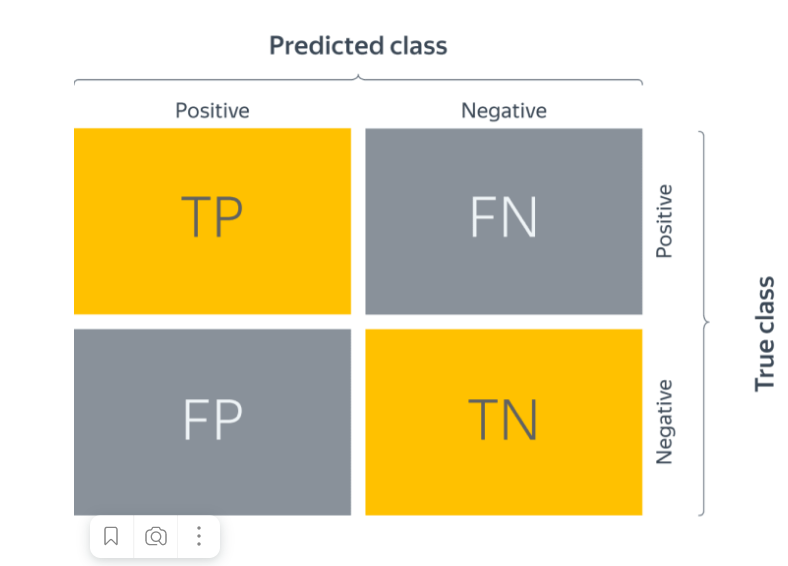

<Axes: >

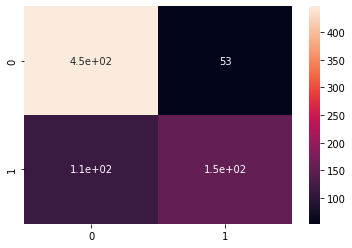

In [24]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [25]:
# метрика точности предсказания - показывает долю правильно распознанных объектов

logistic.score(X, y)

0.7825520833333334

In [27]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [28]:
# Значение метрики (0,78) показывает, что модель в среднем делает ошибки в 22% процентов случаев. Это основной показатель качества модели

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly = PolynomialFeatures(2)  # объект преобразования, полиномиальные признаки 2 порядка

In [32]:
poly = poly.fit_transform(X)    # создание полиномиальных признаков 
poly  

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [33]:
polynomial = LogisticRegression()    # логистическая регрессия
polynomial.fit(poly, y)      
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Задания для самостоятельного выполнения
1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:\
Метод опорных векторов\
Без ядра\
С линейным ядром\
С гауссовым ядром\
С полиномиальным ядром\
Метод ближайших соседей\
Многослойный перцептрон\
Дерево решений\
Наивный байесовский классификатор\
(*) Другие методы:\
Пассивно-агрессивный классификатор\
Гребневый классификатор\
Случайный лес\
Беггинг\
Другие модели по желанию
3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
4. Повторите проведенный анализ для другой
5. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [42]:
# метрика точности  